#  Business analytics for marketing team

This project's data has been collected from Yandex.Afisha service. It contains server logs from June 2017 through May 2018, dump file with all orders for the period and marketing expenses statistics.

The main question is to help optimize marketing expenses: marketing experts wants to know how much money to invest and where.
What sources/platforms can be recommended? What metrics are the most important? 




**Description of the data:**
* The visits table (server logs with data on website visits):
 * Uid — user's unique identifier
 * Device — user's device
 * Start Ts — session start date and time
 * End Ts — session end date and time
 * Source Id — identifier of the ad source the user came from
 
*All dates in this table are in YYYY-MM-DD format*

* The orders table (data on orders):
 * Uid — unique identifier of the user making an order
 * Buy Ts — order date and time
 * Revenue — Yandex.Afisha's revenue from the order
 
* The costs table (data on marketing expenses):
 * source_id — ad source identifier
 * dt — date
 * costs — expenses on this ad source on this day

## Initialization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## Data preparation

### Visits

Downloading a part of the data in order to discover, which optimizations can be done:

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv',nrows=500)
visits.info(memory_usage='deep')
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.Device.value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

On the moment of data download it can be optimized: the `Device` columns should be of *category* type and columns with dates `Start Ts` and `End Ts` can be converted to *datetime* type

In [4]:
visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts']) 
visits.info(memory_usage='deep')
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Columns' names fixing to lower and snake case

In [5]:
visits.columns = [x.replace(' ','_').lower() for x in visits.columns]
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [6]:
visits.duplicated().sum()

0

Dataframe is ready for analysis, no missing or duplicative data found

### Orders

Downloading a part of the data in order to discover, which optimizations can be done:

In [7]:
orders = pd.read_csv('/datasets/orders_log_us.csv',nrows=500)
orders.info(memory_usage='deep')
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


A column `Buy Ts` shoulb be converted to the *datetime* type

In [8]:
orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts']) 
orders.info(memory_usage='deep')
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Fixing colums' names

In [9]:
orders.columns = [x.replace(' ','_').lower() for x in orders.columns]
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [10]:
orders.duplicated().sum()

0

Dataframe is ready for analysis, no missing or duplicative data found

### Marketing expenses

In [11]:
costs = pd.read_csv('/datasets/costs_us.csv',nrows=500)
costs.info(memory_usage = 'deep')
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Column `dt` should be converted to *datetime* data type

In [12]:
costs = pd.read_csv('/datasets/costs_us.csv', parse_dates = ['dt'])
costs.info(memory_usage = 'deep')
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [13]:
costs.duplicated().sum()

0

Dataframe is ready for analysis, no missing or duplicative data found

## Data analysis
### Product

In [14]:
# Data enrichment with day, week, month and year of session

visits['session_year']  = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date

visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


#### Discovering how many people use service

In order to discover how many people use the service every day, week, and month metrics **DAU**, **WAU** and **MAU** may be calculated:

In [15]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('DAU =',int(dau_total))
print('WAU =',int(wau_total))
print('MAU =',int(mau_total))

DAU = 907
WAU = 5716
MAU = 23228


There are on average 907 unique users a dyy, 5716 unique users per week, 23228 unique users per month

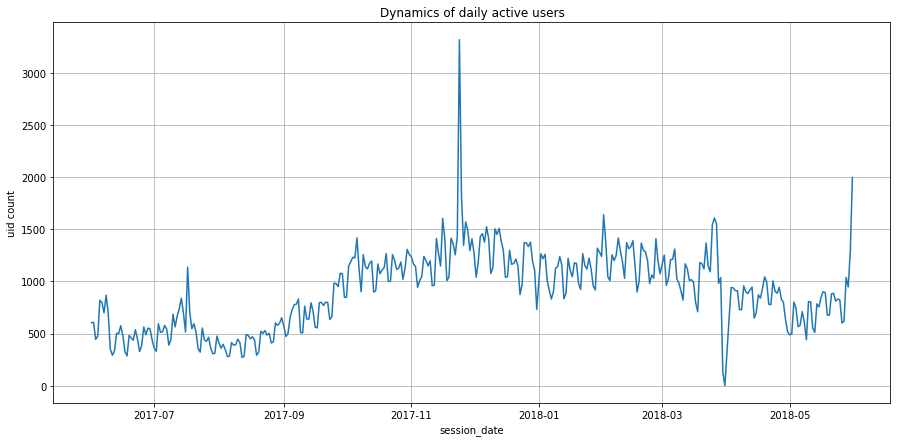

In [16]:
plt.figure(figsize = (15,7))
sns.lineplot(data = visits.groupby('session_date').agg({'uid': 'nunique'}), x = 'session_date', y = 'uid')

plt.title('Dynamics of daily active users')
plt.ylabel('uid count')
plt.grid()
plt.show()

As it can be observed on the plot, the number of daily unique users on the service is not very stable, it is lowest in the period 2017-06 - 2017-10, then rises in about 2-2,5 times till 2018-04 with a slight fall in the last months of the observations. Also, It can be seen, that there some dates, where number of users have a dramatic increas (somewhere near New year) and decrease (somewhere in the start of april)

#### Discovering a number of sessions per day

In [17]:
daily_sessions = visits.groupby('session_date').agg({'uid': 'count'}).mean()

print('Average number of daily sessions',int(daily_sessions))
print('Daily sessions per person',round((daily_sessions/dau_total),2)[0])
print('Share of users, who visit service more, then once a day:',round(1-(int(dau_total)/int(daily_sessions)),2))

Average number of daily sessions 987
Daily sessions per person 1.09
Share of users, who visit service more, then once a day: 0.08


In average, 1 user visits service only once in a given day, 8% of users visit service twice or more in 1 day

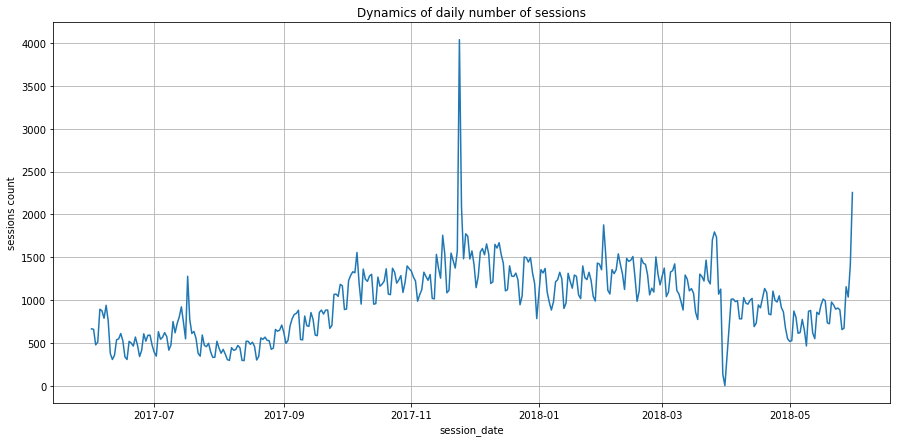

In [18]:
plt.figure(figsize = (15,7))
sns.lineplot(data = visits.groupby('session_date').agg({'uid': 'count'}), x = 'session_date', y = 'uid')

plt.title('Dynamics of daily number of sessions')
plt.ylabel('sessions count')
plt.grid()
plt.show()

Daily sessions show the same tendences as number of unique users, which is logical, as there is 1.09 sessions per user in a day.

#### Calculating the length of each session

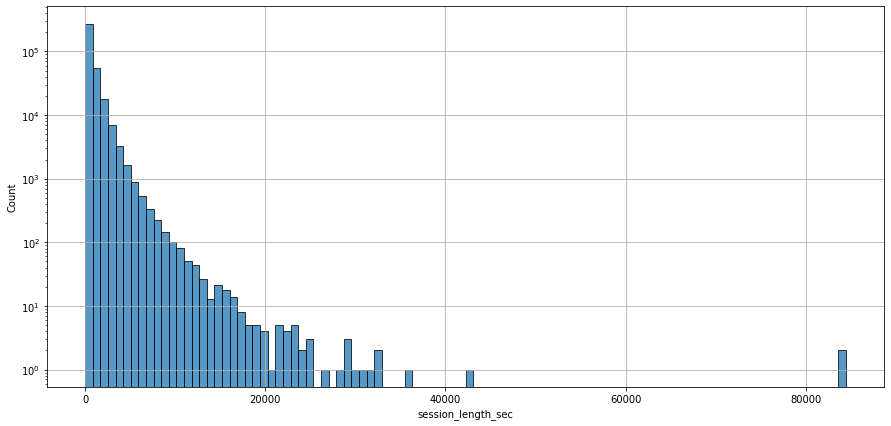

Mode of the session lengths is 60

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_length_sec, dtype: float64


In [19]:
visits['session_length_sec'] = (visits['end_ts']-visits['start_ts']).dt.seconds

plt.figure(figsize = (15,7))
sns.histplot(data=visits['session_length_sec'],bins = 100, log_scale = (False,True))
plt.grid()
plt.show()
print('Mode of the session lengths is', visits['session_length_sec'].mode()[0])
print()
print(visits['session_length_sec'].describe())

There are a great variaty of sessions' lengths, with mode of 60, average of 644 and median of 300, that shows a strong skewness of the data.
Most probably these ones, which larger then several minutes (up to 15, maybe 30, this time should be totally enough for user to study all avaliable offers of the service) may be treaten as outliers:

In [20]:
print('With a threshold of 30 minutes there are', (visits[(visits['session_length_sec']<1800)].shape[0]),'sessions remain the dataset')
print('Inintial number of the recorded sessions in logs is',visits.shape[0])
print('So,',round(visits[(visits['session_length_sec']<1800)].count()[0]/visits.shape[0]*100),'% of the data will remain')


With a threshold of 30 minutes there are 329640 sessions remain the dataset
Inintial number of the recorded sessions in logs is 359400
So, 92 % of the data will remain


For now I will keep this data, as it is definitely an initiated sessions, which represent, that a person has opened the website/application, but didn't close it after 30 minutes. 

Discovering, from which device a long visits come from:

In [21]:
visits[visits['session_length_sec']>1800]['device'].value_counts()

desktop    23584
touch       4309
Name: device, dtype: int64

Most of them are from desktop, it may be a situation, that a tab with a website just was not closed by a user, after he/she opened it.

#### User retention rate
In order to calculate the user retention rate cohorts must be built. For this task I will generate month's cohorts.

Exploring the first session date and adding it to the initial dataset:

In [22]:
first_activity_date = visits.groupby('uid')['session_date'].min()
first_activity_date.name = 'first_activity_date'

In [23]:
visits = visits.join(first_activity_date, on = 'uid')

In [24]:
visits['session_date'] = pd.to_datetime(visits['session_date'])
visits['first_activity_date'] = pd.to_datetime(visits['first_activity_date'])

Enriching the dataset with first activity month of the cohorts:

In [25]:
visits['first_activity_month'] = visits['first_activity_date'].dt.to_period('M')

Calculating the cohorts lifetime:

In [26]:
visits['cohort_lifetime'] = visits['session_date'].dt.to_period('M').astype(int) - visits['first_activity_month'].astype(int)

Calculating the number of users from the cohorts on different lifetime points:

In [27]:
cohorts = (visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()) 
cohorts = cohorts.rename(columns = {'uid':'cohort_users'})

Adding a column with the initial number of the users in cohorts:

In [28]:
initial_cohort_users = cohorts[(cohorts['cohort_lifetime']==0)][['first_activity_month','cohort_users']]
initial_cohort_users = initial_cohort_users.rename(columns = {'cohort_users':'initial_cohort_users'})

cohorts = cohorts.merge(initial_cohort_users, on = 'first_activity_month')

Calculating a retention:

In [29]:
cohorts['retention'] = cohorts['cohort_users']/cohorts['initial_cohort_users']

Pivot table generating for heatmap creation:

In [30]:
retention_pivot = cohorts.pivot_table(index = 'first_activity_month', columns = 'cohort_lifetime', values = 'retention', aggfunc = 'sum')

Ploting the heatmap:

In [32]:
retention_pivot.drop(0, inplace=True, axis=1)

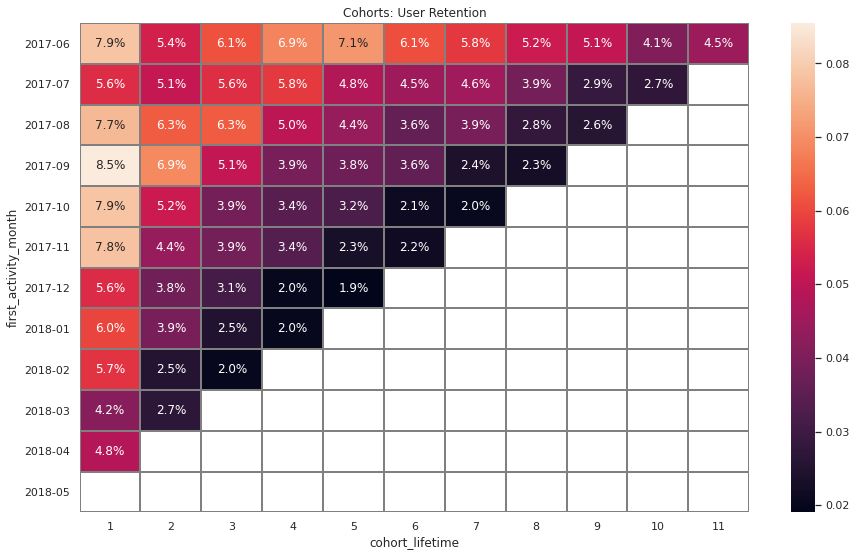

In [33]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray') 
plt.show()

The user retention rate of the cohorts is not optimistic: only 5-8% of users visit service on the second month, then goes some fluctuations of user numbers, but in most cases by the last month of the cohort lifetime only 2-5% of users still visit it.

We can say, that even if an ad works well for making new people visit the service, only a tiny share of them will visit it for second time and futher.

### Sales
#### When do people start buying?

In order to discover, when do people start buying, first of all, the date of the first purchase should be found, I will create a new subset for that and merge it with the `sessions` logs with the `first activity` column:

In [34]:
first_orders = orders.groupby('uid')['buy_ts'].min()
first_orders.name = 'first_order_date'
first_orders.drop_duplicates().shape[0]

34122

In [35]:
first_orders.shape[0]/orders.shape[0]

0.7244470891599722

So, about 72% of dataset contain information about first and the only purchase of the users.

Merging with the data on first users' activity dates:

In [36]:
visits_slice = visits[['uid','first_activity_date']].drop_duplicates()
first_orders = pd.merge(first_orders, visits_slice, on = 'uid', how = 'left')

And add a colums with a number of days passed from first activity date to a date of purchase:

In [37]:
first_orders['time_delta'] = first_orders['first_order_date'] - first_orders['first_activity_date']
first_orders['days_passed'] = first_orders['time_delta'].dt.days

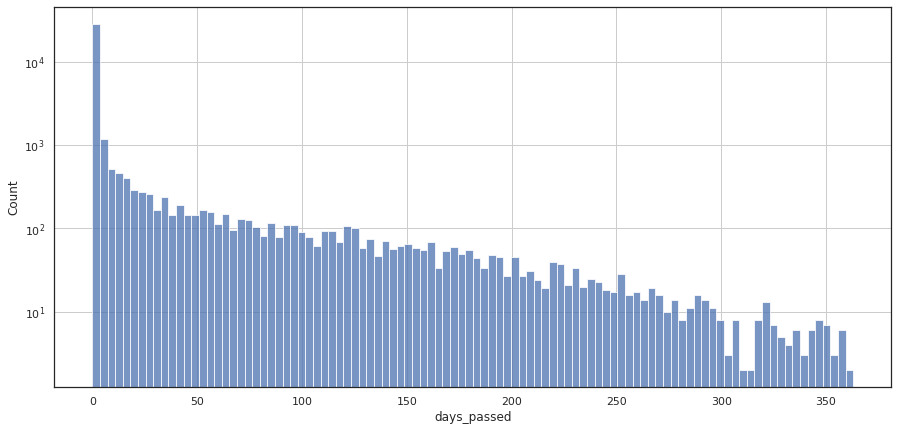

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_passed, dtype: float64

In [38]:
plt.figure(figsize = (15,7))
sns.histplot(data=first_orders['days_passed'],bins = 100,log_scale = (False,True))
plt.grid()
plt.show()

first_orders['days_passed'].describe()

In [39]:
(first_orders[first_orders['days_passed']==0].count()[0])/first_orders.shape[0]

0.6855679982476796

Almost 69% of the users make their first and the only purchase on the first day on the service. Around 75% of users make their first purchase within 2 days. As some users buy something after almost a year after their first session on the service, the average here is 17 days with a std of 47!.

#### Marketing channels

* **First visit channel**

To discover, from which marketing channer did the persone come for the first time and made a purchase, I will merge the `orders` dataset with `visits` dataset on `uid` taking the `source_id` of the users' `first_activity_date`.

Creating a slice from `visits` dataset with the the `source_id` of the first visit.

P.S. Doing this I've found some users, who came on the same day as their first visit, but from another source:

In [40]:
first_visit_source = visits[(visits['session_date']==visits['first_activity_date'])][['uid','source_id']]
print('Unique users, with the same visit dates as their first visit date:',first_visit_source.shape[0])
print('Number of users with more than one visit in their first day on the service:', first_visit_source['uid'].duplicated().sum())
print('Share of them:',round(first_visit_source['uid'].duplicated().sum()/first_visit_source.shape[0],2))

Unique users, with the same visit dates as their first visit date: 239740
Number of users with more than one visit in their first day on the service: 11571
Share of them: 0.05


In [41]:
first_visit_source = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visit_source

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [42]:
first_visit_source = pd.merge(first_visit_source,visits[['start_ts','source_id','uid']], on=['uid','start_ts'], how = 'left')

In [43]:
first_visit_source = first_visit_source.drop_duplicates()

In [44]:
first_visit_source = first_visit_source.rename(columns = {'source_id':'first_source_id'})

In [45]:
orders.shape

(50415, 3)

In [46]:
orders = pd.merge(orders,first_visit_source, on = 'uid', how = 'left')
orders

,buy_ts,revenue,uid,start_ts,first_source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,3
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,3


In [47]:
orders.shape

(50415, 5)

In [48]:
sources = orders.groupby('first_source_id')['revenue'].agg(['sum', 'count']).reset_index()

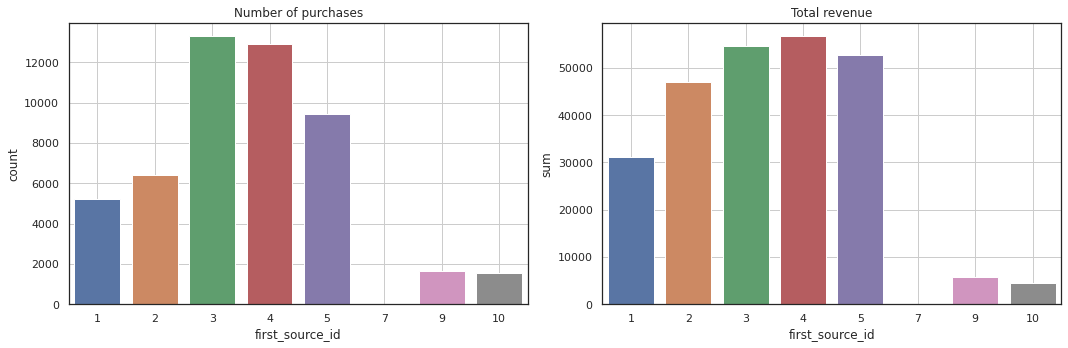

In [49]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(data = sources, x = 'first_source_id', y = 'count')
plt.title("Number of purchases")
plt.tight_layout()
plt.grid()

plt.subplot(1, 2, 2)
ax2 = sns.barplot(data = sources, x = 'first_source_id', y = 'sum')
plt.title("Total revenue")
plt.tight_layout()
plt.grid()

plt.show()

So, the least profitable sources are 7, 9 and 10, a small number of people come from them to buy and the revenue from them is small.

The most profitable sources are 2, 3, 4, 5.

It should be interesting to calculate the average share of people, attracted from the source  and the amount of money they then spend on the service:

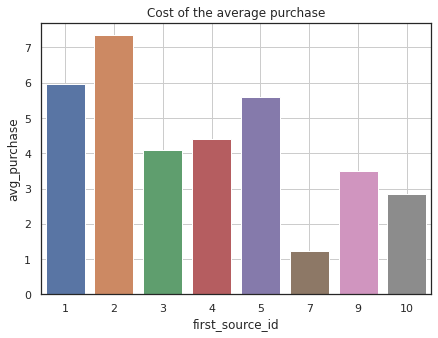

In [50]:
sources['avg_purchase'] = sources['sum']/sources['count']

plt.figure(figsize = (7,5))
plt.title('Cost of the average purchase')
sns.barplot(data = sources, x = 'first_source_id', y = 'avg_purchase')
plt.grid()
plt.show()

Sources 1,2,3,4,5 brings on average 4-7.5 dollars. 7, 9 and 10 bring 1-4 dollars on average.

This results should correlate well with the another aspect of the question: which sources did make them actually buy a product (because first visit and purchase are different processes, person could be already registered, but bought something only after seeing another ad of the particular event). 

69% of purchases were made on the first visits' date (so the first ad they've seen is the ad made them buy), as it was revealed earlier.

* **Source, led to purchase**

To make this analysys I need to add a column, which show the `source_id` with the same session date as the date of purchase. Here I will a bit ease the task, as there is almost only 1 session per user per day, so I won't interconnect precisely the exact time of purchase with the exact time of user's session, but only a date.

For that another slice of `visits` dataset should be created and duplicates checked (if person was on the service in a date of purchase more, than once):

In [51]:
sources = visits[['uid', 'session_date', 'source_id']]
print('All logs contain:', sources.shape[0])
print('Number rows with dupliced pair of uid and session date',sources[['uid', 'session_date']].duplicated().sum())
print('It is', round(sources[['uid', 'session_date']].duplicated().sum()/sources.shape[0], 2), 'of the subset')

All logs contain: 359400
Number rows with dupliced pair of uid and session date 28891
It is 0.08 of the subset


This amount can be droped without hesitation:

In [52]:
sources = sources.drop_duplicates(subset = ['uid', 'session_date'], keep='last')
sources.shape

(330509, 3)

Now, this subset can be added to the `orders` dataframe:

In [53]:
orders['order_date'] = orders['buy_ts'].dt.date
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [54]:
orders.shape

(50415, 6)

In [55]:
orders = pd.merge(orders, sources, left_on = ['uid','order_date'], right_on = ['uid','session_date'], how = 'left')

In [56]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   buy_ts           50415 non-null  datetime64[ns]
 1   revenue          50415 non-null  float64       
 2   uid              50415 non-null  uint64        
 3   start_ts         50415 non-null  datetime64[ns]
 4   first_source_id  50415 non-null  int64         
 5   order_date       50415 non-null  datetime64[ns]
 6   session_date     41760 non-null  datetime64[ns]
 7   source_id        41760 non-null  float64       
dtypes: datetime64[ns](4), float64(2), int64(1), uint64(1)
memory usage: 3.5 MB


Unwanted column `session_date` appeared, so I will drop it:

In [57]:
orders.drop('session_date', inplace=True, axis=1)

In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   buy_ts           50415 non-null  datetime64[ns]
 1   revenue          50415 non-null  float64       
 2   uid              50415 non-null  uint64        
 3   start_ts         50415 non-null  datetime64[ns]
 4   first_source_id  50415 non-null  int64         
 5   order_date       50415 non-null  datetime64[ns]
 6   source_id        41760 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(1), uint64(1)
memory usage: 3.1 MB


In [59]:
orders = orders.rename(columns = {'source_id':'purchase_source_id'})

Now, everything is ready to provide the analysis: <a id='rev_n_purch_source'></a>

In [60]:
sources = orders.groupby('purchase_source_id')['revenue'].agg(['sum', 'count']).reset_index()

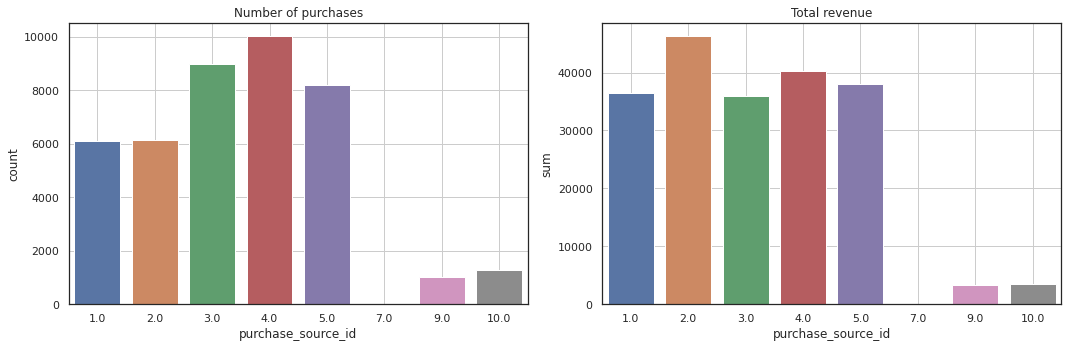

In [61]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(data = sources, x = 'purchase_source_id', y = 'count')
plt.title("Number of purchases")
plt.tight_layout()
plt.grid()

plt.subplot(1, 2, 2)
ax2 = sns.barplot(data = sources, x = 'purchase_source_id', y = 'sum')
plt.title("Total revenue")
plt.tight_layout()
plt.grid()

plt.show()

So, the least profitable sources are 7, 9 and 10, the same picture, as it was earlier. However, now the most profitable in terms of revenue is source 2, then come 1, 5, 4, 3, so, the ad on different sources can truly bring already registered people to buy something not in the first day of service usage and create a bit different picture. 

It terms of number of agitated people leaders are 1, 3, 4, 5, then goes 2.

Again, it should be interesting to calculate the average ratio of people, attracted from the source  and the amount of money they then spend on the service:

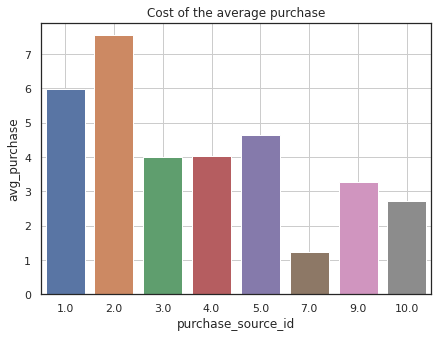

In [62]:
sources['avg_purchase'] = sources['sum']/sources['count']

plt.figure(figsize = (7,5))
plt.title('Cost of the average purchase')
sns.barplot(data = sources, x = 'purchase_source_id', y = 'avg_purchase')
plt.grid()
plt.show()

In principal, the picture stays the same as in first part of the study:

Absolute leaders here are 1 and 2, than goes 5, after which 3 and 4. The worst results are of the source 7: the smallest number of people attracted and those people spend the smallest amount of money on their purchases.

#### Cohorts' conversion

Calculating the number of users and buyers in cohorts:
* users

In [63]:
n_users = visits.groupby('first_activity_month').agg({'uid':'nunique'})
n_users = n_users.rename(columns = {'uid':'n_users'})

* buyers

Merging `orders` subsets with `visits_slice`, created earlier with information about the first activity date of each user and changing it to the first activity month:

In [64]:
orders = pd.merge(orders, visits_slice, on = 'uid', how = 'left')
orders.shape

(50415, 8)

In [65]:
orders['first_activity_month'] = orders['first_activity_date'].dt.to_period('M')

In [66]:
n_buyers = orders.groupby('first_activity_month').agg({'uid':'nunique'})
n_buyers = n_buyers.rename(columns = {'uid':'n_buyers'})

In [67]:
conversion = pd.merge(n_users,n_buyers, on = 'first_activity_month')
conversion['conversion'] = conversion['n_buyers']/conversion['n_users']
print(conversion['conversion'].describe())

count    12.000000
mean      0.162379
std       0.027383
min       0.120313
25%       0.142115
50%       0.158823
75%       0.180829
max       0.220454
Name: conversion, dtype: float64


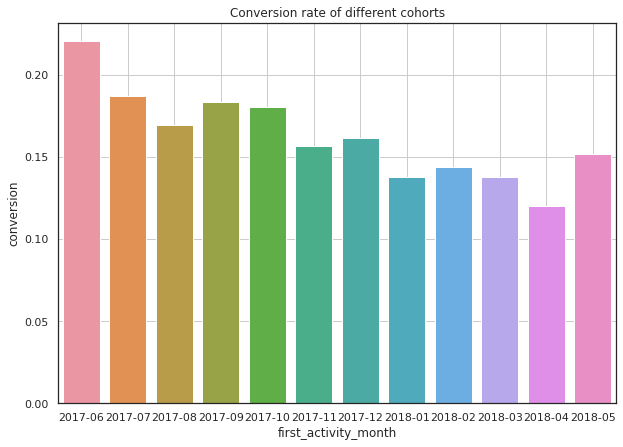

In [68]:
plt.figure(figsize=(10,7))
sns.barplot(x='first_activity_month', y='conversion', data=conversion.reset_index())
plt.title('Conversion rate of different cohorts')
plt.grid()

The best conversion is found in the cohort from 2017-06, the worst one is in cohort from 2018-04.

#### Dynamics of attracted money from the cohorts

In order to determine, how do cohorts bring money, we should create cohorts in `orders` dataset. For it I will 

Calculating the number of passed months to find, on which cohorts' lifetime's period the purchase was done:

In [69]:
orders['time_delta'] = orders['buy_ts'] - orders['first_activity_date']
orders['months_passed'] = (orders['time_delta']/np.timedelta64(1, 'M')).apply(np.floor).astype(int)

Calculating the total cohort revenue for the whole period in order to calculate the share of revenue for each month of the cohort's lifetime:

In [70]:
total_cohort_revenue = orders.groupby('first_activity_month')['revenue'].sum()
total_cohort_revenue.name = 'total_revenue'

orders = pd.merge(orders,total_cohort_revenue,on='first_activity_month', how = 'left')

orders['revenue_share'] = orders['revenue']/orders['total_revenue'] 

Creating a pivot table:

In [71]:
revenue_pivot = orders.pivot_table(index = 'first_activity_month', columns = 'months_passed', values = 'revenue_share', aggfunc = 'sum')

Visualization on heatmap:

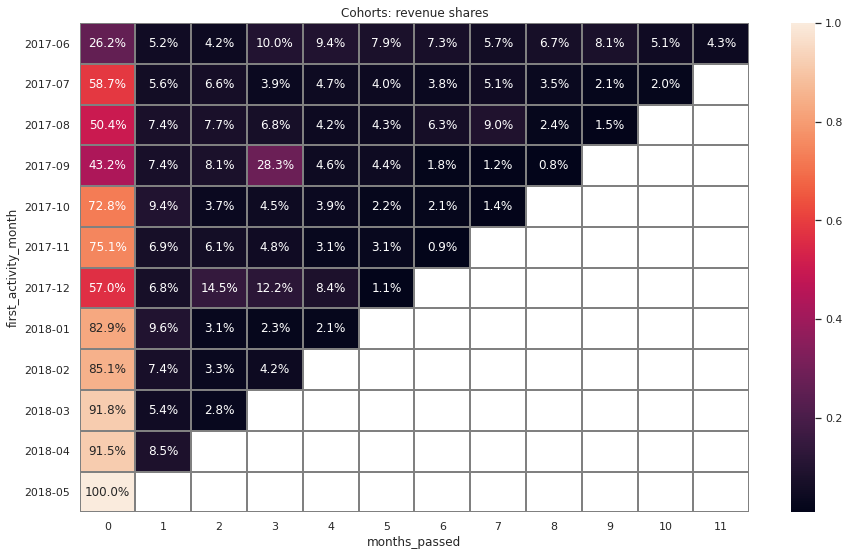

In [72]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: revenue shares')
sns.heatmap(revenue_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray') 
plt.show()

Only one strong pattern can be observed here and it almost repeats the one of the cohorts' retension: the biggest share of revenue comes in the first month of service usage. Then it dramatically falls in 4-10 times and fluctuates from month to month. In some cohorts the last lifetime's month gives only 1-2% of total amount of money, spent by users.

#### How many orders do they make during a given period of time?

Histogram and describe method:

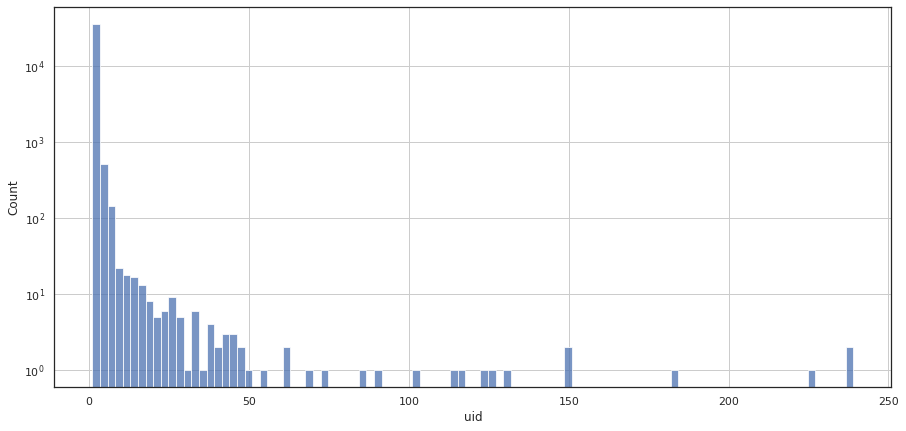

count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: uid, dtype: float64

In [73]:
plt.figure(figsize = (15,7))
sns.histplot(data=orders['uid'].value_counts(),bins = 100,log_scale = (False,True))
plt.grid()
plt.show()

orders['uid'].value_counts().describe()

Looks like most of them make only one purchase, and on average it is 1.4 purchasers per person. Also there are some users, who made a huge amount of purchasers: up to 239! This can be done by somebody, who resell tickets for a higher price or a user from, for example, school or university, who centrally buys tickets for many pupils/students. Such exaples can also be treaten as an outliers, will keep this in mind during futher conversion analysis.


In [74]:
print('On average',round(orders.shape[0]/visits['uid'].nunique(),2),' of purchases are done per unique visitor of the service')
print(round(orders['uid'].nunique()/visits['uid'].nunique(),2),'of unique visitors of the service made at least 1 purchase')

On average 0.22  of purchases are done per unique visitor of the service
0.16 of unique visitors of the service made at least 1 purchase


Will create a heatmap with the shares of number of purchases made on different lifetime points of cohorts:

In [75]:
cohort_purchases = orders.groupby('first_activity_month')['uid'].agg('count')
cohort_purchases.name = 'total_purchases'

In [76]:
orders = pd.merge(orders, cohort_purchases, on = 'first_activity_month', how = 'left')

In [77]:
orders['purcahse_share'] = 1/orders['total_purchases']

In [78]:
purchases_pivot = orders.pivot_table(index = 'first_activity_month', columns = 'months_passed', values = 'purcahse_share', aggfunc = 'sum')

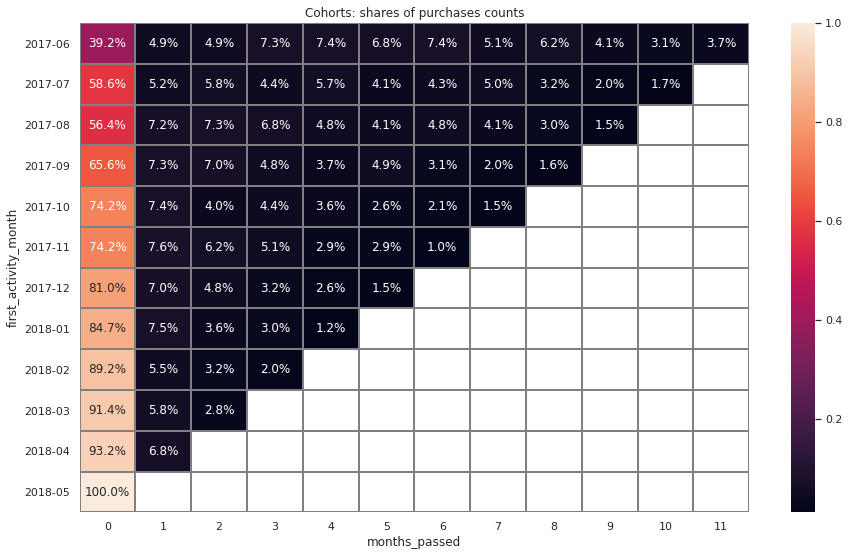

In [79]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: shares of purchases counts')
sns.heatmap(purchases_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray') 
plt.show()

The picture here recreates the same pattern:

biggect amount of purchases in cohort done in the first month, then goes the significant fall, which fluctuates heavily, but never exceed 10% of all purchases.

So, new users buy at the first month mostly and then only small part of purchases done in futher time.

In [80]:
for_pivot = orders.groupby(['first_activity_month','months_passed'])['uid'].agg('count').reset_index()
for_pivot2 = orders.groupby(['first_activity_month'])['uid'].agg('nunique').reset_index()

In [81]:
for_pivot = for_pivot.merge(for_pivot2, on = 'first_activity_month', how = 'left')

In [82]:
for_pivot['avg_n_purchases_per_buyer'] = round(for_pivot['uid_x']/for_pivot['uid_y'],2)

In [83]:
purchases_pivot = for_pivot.pivot_table(index = 'first_activity_month', columns = 'months_passed', values = 'avg_n_purchases_per_buyer', aggfunc = 'mean')
purchases_pivot.fillna('')

months_passed,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,0.86,0.11,0.11,0.16,0.16,0.15,0.16,0.11,0.14,0.09,0.07,0.08
2017-07,0.84,0.08,0.08,0.06,0.08,0.06,0.06,0.07,0.05,0.03,0.02,
2017-08,0.87,0.11,0.11,0.1,0.07,0.06,0.07,0.06,0.05,0.02,,
2017-09,0.93,0.1,0.1,0.07,0.05,0.07,0.04,0.03,0.02,,,
2017-10,0.99,0.1,0.05,0.06,0.05,0.04,0.03,0.02,,,,
2017-11,1.04,0.11,0.09,0.07,0.04,0.04,0.01,,,,,
2017-12,1.04,0.09,0.06,0.04,0.03,0.02,,,,,,
2018-01,1.05,0.09,0.04,0.04,0.02,,,,,,,
2018-02,1.08,0.07,0.04,0.02,,,,,,,,


#### What is the average purchase size?
Histogram and describe method:

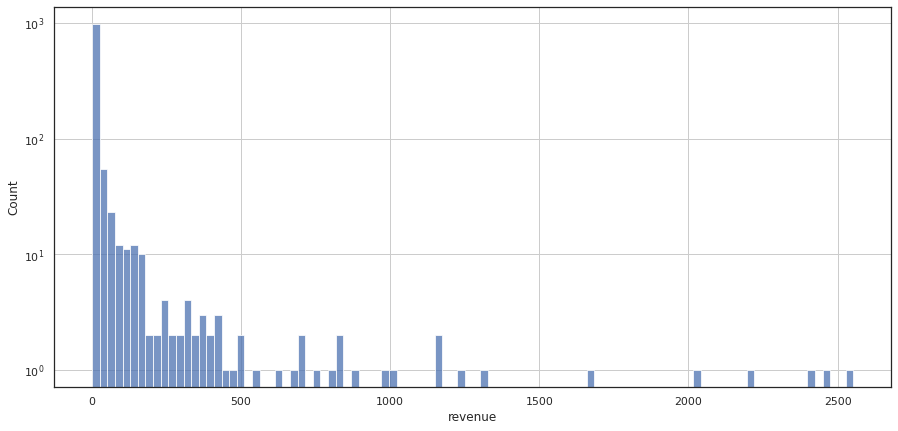

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [84]:
plt.figure(figsize = (15,7))
sns.histplot(data=orders['revenue'].value_counts(),bins = 100,log_scale = (False,True))
plt.grid()
plt.show()

orders['revenue'].describe()

The data is heavily skewed to the right with the median of 2.7 dollars(?) per purchase and average size cost of 5.3, there are some gigantic purchases of more than 1000 with the maximum of 2633! Although 75% percent of all the purchases are cheaper than 5 (which is less than the average). 

In [85]:
for_plot = orders[['order_date','revenue']]
for_plot['order_month'] = for_plot['order_date'].dt.to_period('M').apply(str)
for_plot

/tmp/ipykernel_27/3364939314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['order_month'] = for_plot['order_date'].dt.to_period('M').apply(str)


,order_date,revenue,order_month
0,2017-06-01,17.00,2017-06
1,2017-06-01,0.55,2017-06
2,2017-06-01,0.37,2017-06
3,2017-06-01,0.55,2017-06
4,2017-06-01,0.37,2017-06
...,...,...,...
50410,2018-05-31,4.64,2018-05
50411,2018-05-31,5.80,2018-05
50412,2018-05-31,0.30,2018-05
50413,2018-05-31,3.67,2018-05


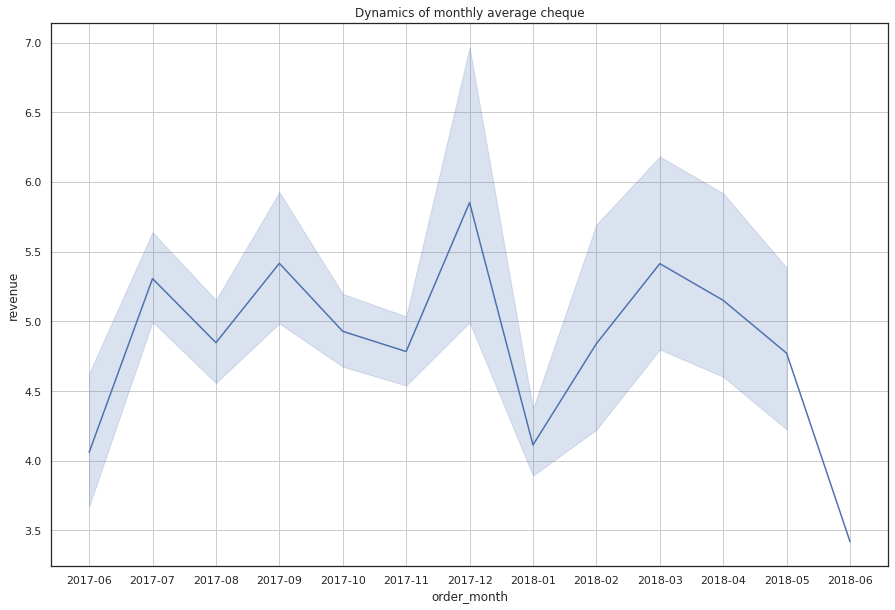

In [86]:
plt.figure(figsize =(15,10))
plt.title('Dynamics of monthly average cheque')
sns.lineplot(data = for_plot, x = 'order_month', y = 'revenue')
plt.grid()

Months with the biggest average cheque are 2017-07, 2017-09, 2017-12 and 2018-03 - 2018-04.

The smallest average cheque was in months 2017-06 and 2018-01 - 2018-02.

#### How much money do they bring? (LTV)

As we don't know the margin rate, will calculate the LTV assuming that it is 100%

Calculating the revenues from the cohorts on different lifetimes:

In [87]:
orders_report = orders.groupby(['first_activity_month','months_passed'])['revenue'].sum().reset_index()
orders_report

,first_activity_month,months_passed,revenue
0,2017-06,0,10487.52
1,2017-06,1,2079.59
2,2017-06,2,1670.72
3,2017-06,3,4000.07
4,2017-06,4,3775.61
...,...,...,...
73,2018-03,1,742.69
74,2018-03,2,390.90
75,2018-04,0,9045.15
76,2018-04,1,837.40


In [88]:
#ADDED BY REVIEWER

orders_report['revenue'].sum()

252057.19999999946

Calculating the number of buyers on different cohorts' lifetime points:

In [89]:
orders_rep2 = orders.groupby('first_activity_month')['uid'].nunique()
orders_rep2.name = 'n_buyers'

Creating a merged subset for report:

In [90]:
orders_report = pd.merge(orders_report,orders_rep2, on = 'first_activity_month', how = 'left')
orders_report

,first_activity_month,months_passed,revenue,n_buyers
0,2017-06,0,10487.52,2923
1,2017-06,1,2079.59,2923
2,2017-06,2,1670.72,2923
3,2017-06,3,4000.07,2923
4,2017-06,4,3775.61,2923
...,...,...,...,...
73,2018-03,1,742.69,2838
74,2018-03,2,390.90,2838
75,2018-04,0,9045.15,1890
76,2018-04,1,837.40,1890


Calculating the LTV:

In [91]:
orders_report['ltv'] = orders_report['revenue']/orders_report['n_buyers']
orders_report

,first_activity_month,months_passed,revenue,n_buyers,ltv
0,2017-06,0,10487.52,2923,3.587930
1,2017-06,1,2079.59,2923,0.711457
2,2017-06,2,1670.72,2923,0.571577
3,2017-06,3,4000.07,2923,1.368481
4,2017-06,4,3775.61,2923,1.291690
...,...,...,...,...,...
73,2018-03,1,742.69,2838,0.261695
74,2018-03,2,390.90,2838,0.137738
75,2018-04,0,9045.15,1890,4.785794
76,2018-04,1,837.40,1890,0.443069


Creating a report pivot table:

In [92]:
orders_report_pivot = orders_report.pivot_table(index='first_activity_month', columns='months_passed', values='ltv', aggfunc= 'mean')
orders_report_pivot.cumsum(axis=1).fillna('')

months_passed,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,3.587930,4.299388,4.870965,6.239446,7.531136,8.611878,9.606233,10.389394,11.302569,12.412624,13.107882,13.693483
2017-07,4.252925,4.656225,5.135549,5.415484,5.75443,6.047059,6.3214,6.690488,6.947295,7.098808,7.246587,
2017-08,3.942708,4.525259,5.12405,5.653771,5.982748,6.315967,6.810686,7.517135,7.703388,7.822121,,
2017-09,4.762953,5.580749,6.475383,9.589271,10.099568,10.581848,10.78467,10.92156,11.014572,,,
2017-10,4.336826,4.896578,5.11512,5.382168,5.615678,5.747369,5.86991,5.955043,,,,
2017-11,4.303979,4.699648,5.047412,5.320124,5.500394,5.676966,5.731281,,,,,
2017-12,4.359391,4.882096,5.994327,6.923559,7.564872,7.647975,,,,,,
2018-01,3.865592,4.311039,4.45781,4.566794,4.663937,,,,,,,
2018-02,4.021460,4.371127,4.52909,4.727335,,,,,,,,


LTV of the first cohort from 2017-06 can be calculated separately as it has the biggest lifetime and best suits for such analysis:

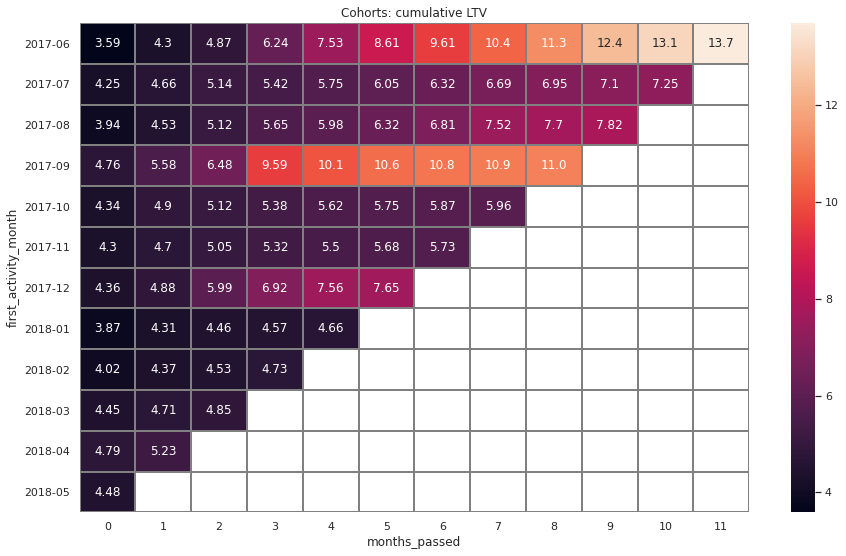

In [93]:
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Cohorts: cumulative LTV')
sns.heatmap(orders_report_pivot.cumsum(axis=1), annot=True, fmt='.3', linewidths=1, linecolor='gray') 
plt.show()

In [94]:
print(orders_report_pivot.loc['2017-06'].sum())

13.69348272322955


On average, each customer from the first cohort brought 13.7 of revenue over their 12-month liftetime.

More detailed overlook on LTV will be done [futher](#ltv_full_report) alongside with the CAC, where I will create the full report subset on cohorts, builded not only by first activity month, but also on the sourse, from which users came to service. 

### Marketing
#### How much money was spent? Overall/per source/over time

* **Overall expenses**

In [95]:
print('Overall amount of money spent on marketing during the whole period is $',costs['costs'].sum())

Overall amount of money spent on marketing during the whole period is $ 329131.62


* **Expenses per source**

In [96]:
total_expenses = costs.groupby('source_id')['costs'].sum().to_frame().reset_index()


I will add graphs from the [previous chapter](#rev_n_purch_source) here to look on the overall picture: <a id='1'></a>

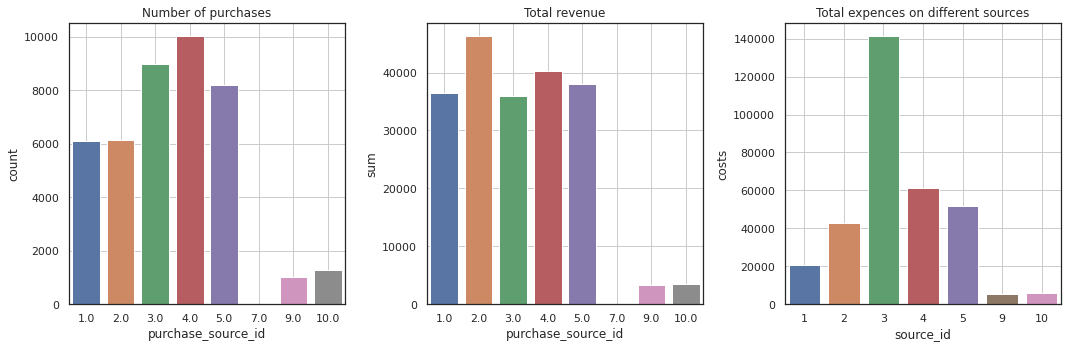

In [97]:
plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
ax1 = sns.barplot(data = sources, x = 'purchase_source_id', y = 'count')
plt.title("Number of purchases")
plt.tight_layout()
plt.grid()

plt.subplot(1, 3, 2)
ax2 = sns.barplot(data = sources, x = 'purchase_source_id', y = 'sum')
plt.title("Total revenue")
plt.tight_layout()
plt.grid()

plt.subplot(1, 3, 3)
ax3 = sns.barplot(data = total_expenses, x = 'source_id', y = 'costs')
plt.title("Total expences on different sources")
plt.tight_layout()
plt.grid()

plt.show()

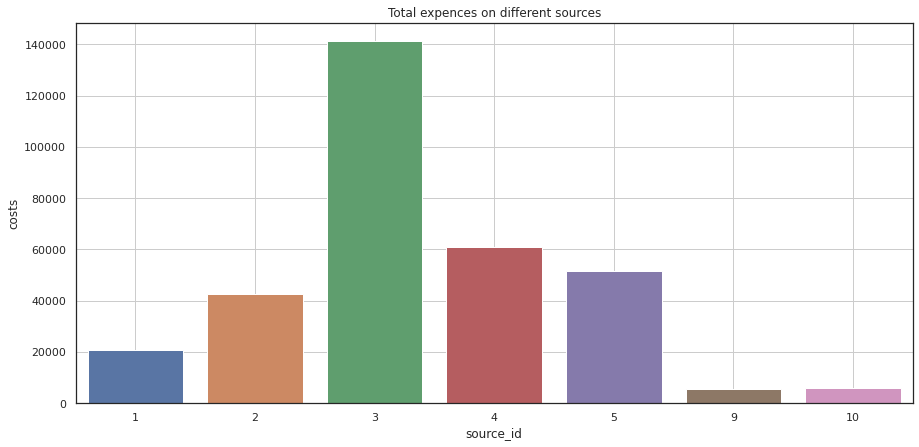

In [98]:
plt.figure(figsize = (15,7))

sns.barplot(data = total_expenses, x = 'source_id', y = 'costs')
plt.title("Total expences on different sources")
plt.grid()

plt.show()

So, the biggest amount of money was invested in source 3, while it brings a good number of new buyers, revenue from them is not great. The best results are for sources 1 and 2, as they bring 3-3,5 time more money, that spent on them. The least amounts were spent on sources 9 and 10, and they bring the smallest numbers of people with the smallest purchases. 

To deeper understand convertation of money spent on money gained I will divide the amount of money gained from the source on amount of money spent on the source: <a id='ratio_spent_gained'></a>

In [99]:
sources = pd.merge(sources, total_expenses, left_on = 'purchase_source_id', right_on = 'source_id', how = 'left')

In [100]:
sources['ratio_gained_spent'] = sources['sum']/sources['costs']

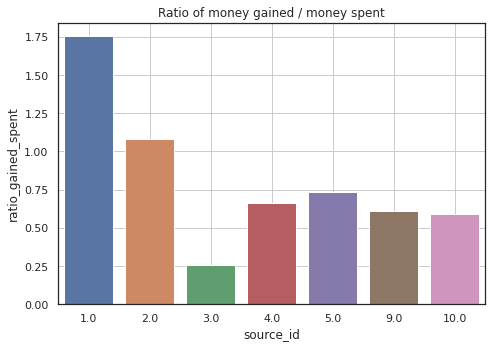

In [101]:
plt.figure(figsize = (7,5))
sns.barplot(data = sources, x = 'source_id', y = 'ratio_gained_spent')
plt.title("Ratio of money gained / money spent")
plt.tight_layout()
plt.grid()

So, the best source, so far, is 1, as it attracts 3 times more money, than were spent. The least profitable is the source 3, it generates about 1/4th of the amount of the expenses (also this one is the most funded one). 

Not bad results are for the sourcer 2 with 1.5 times more income than outcome. And the 5th barely pays off.

4, 9 and 10 bring a bit more than a half of the money spent on them.

* **Overtime**

First of all I will group expences by months in order to see them in dynamics:

In [102]:
costs['dt_month'] = costs['dt'].dt.to_period('M')

In [103]:
sources_months = costs.groupby(['source_id','dt_month'])['costs'].sum().to_frame().reset_index()

This bare numbers do not say too much, so I will create a column with a share of spent money for exact month with the whole period: 

In [104]:
sources_months = pd.merge(sources_months, sources[['source_id','costs']], on = 'source_id', how = 'left')

In [105]:
sources_months = sources_months.rename(columns = {'costs_x':'expences_in_month','costs_y':'total_expenses'})
sources_months['month_share'] = sources_months['expences_in_month']/sources_months['total_expenses']

In [106]:
sources_months['dt_month'] = sources_months['dt_month'].apply(str) #This is done for a lineplot creation

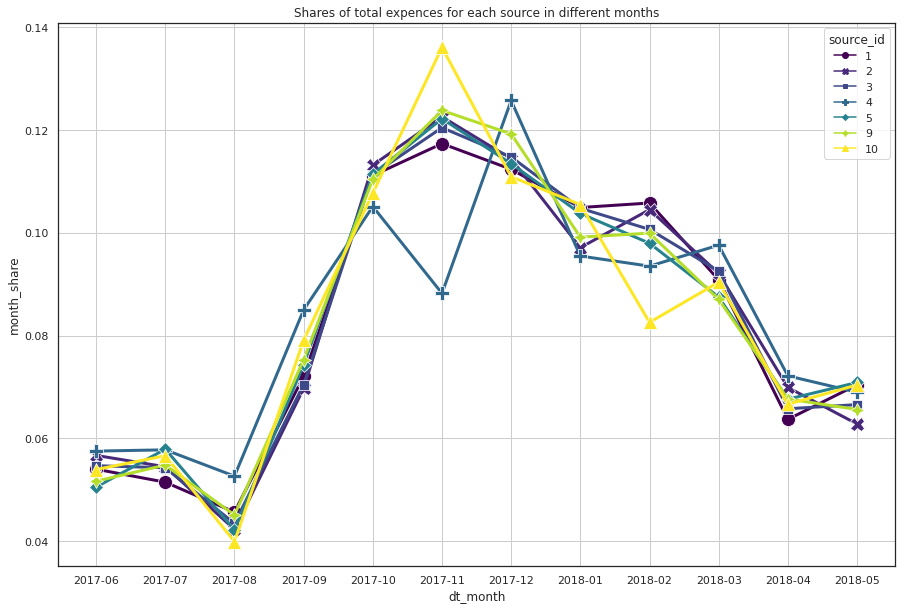

In [107]:
plt.figure(figsize = (15,10))
palette = sns.color_palette("viridis", as_cmap=True)
sns.lineplot(data=sources_months, x="dt_month", y="month_share", hue = 'source_id', style="source_id",palette=palette,linewidth = 3, markers = True,dashes=False, markersize=14, legend = 'full')
plt.title("Shares of total expences for each source in different months")
plt.grid()
plt.show()

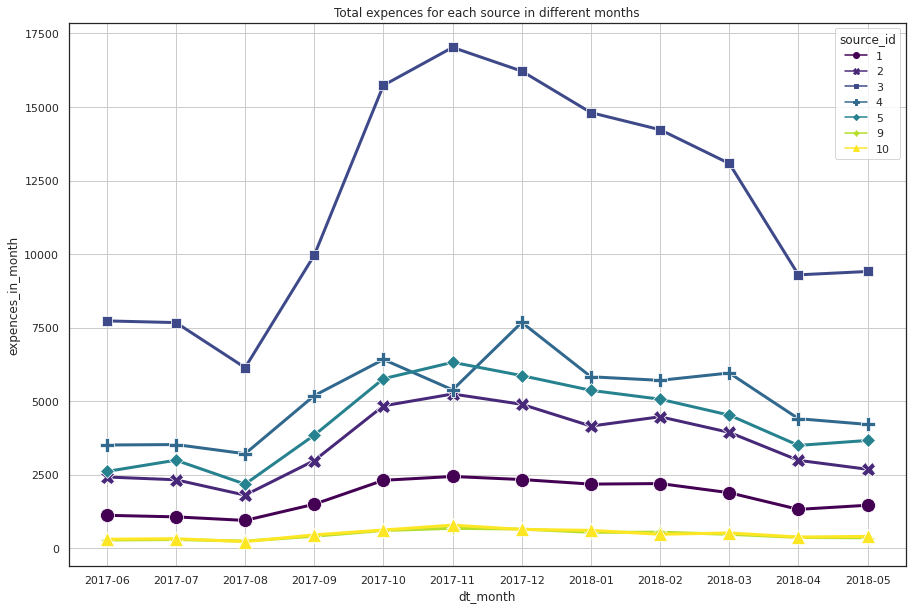

In [108]:
plt.figure(figsize = (15,10))
sns.lineplot(data = sources_months, x = 'dt_month', y = 'expences_in_month', hue = 'source_id', style = 'source_id',palette=palette,linewidth = 3, markers = True,dashes=False, markersize=14, legend = 'full')
plt.title("Total expences for each source in different months")
plt.grid()
plt.show()

In [109]:
sum_costs = sources_months.pivot_table(index='source_id', values='expences_in_month', columns='dt_month')

sum_costs

dt_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


So, over the studied perod the picture of how different sources were financed during the year is pretty same for all sources exept for source 10 is being a bit less intensively paid than others on the month 2018-02 and paid more than others on the month 2017-11 (in share of the total year expences for thic source). And source 4 has significantly less share of the spent money on it in month 2017-11.

Overall picture is that the most intensively financed months are 2017-10-2018-02. The minimum is in 2017-08 month.

It may also be interesting to observe, if there is a correlation between expences on different sources and number of buyers in formed cohorts in each month of study. For that I need to prepare the analogous subset with share of buyers attracted:

In [110]:
n_buyers = orders.groupby(['first_source_id','first_activity_month']).agg({'uid':'nunique'}).reset_index()
n_buyers['first_activity_month'] = n_buyers['first_activity_month'].apply(str)
n_buyers_sources_months = n_buyers.groupby(['first_source_id'])['uid'].sum().to_frame().reset_index()
n_buyers_sources_months = n_buyers_sources_months.rename(columns = {'uid':'total_buyers_from_source'})
n_buyers = pd.merge(n_buyers,n_buyers_sources_months, on = ['first_source_id'], how = 'left')
n_buyers['n_buyers_share'] = n_buyers['uid']/n_buyers['total_buyers_from_source']

And create a lineplot with shares of buyers:

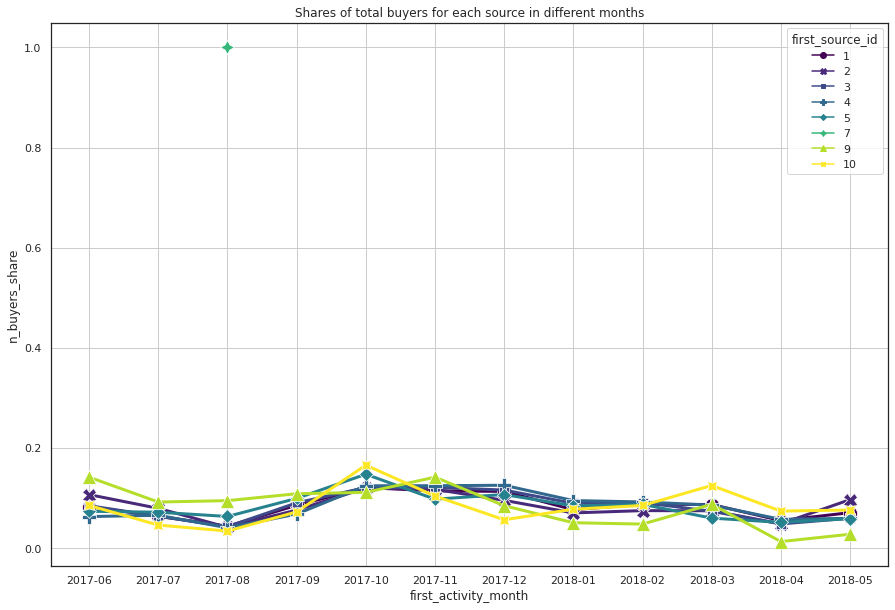

In [111]:
plt.figure(figsize = (15,10))
palette = sns.color_palette("viridis", as_cmap=True)
sns.lineplot(data=n_buyers, x="first_activity_month", y="n_buyers_share", hue = 'first_source_id', style="first_source_id",palette=palette,linewidth = 3, markers = True,dashes=False, markersize=14, legend = 'full')
plt.title("Shares of total buyers for each source in different months")
plt.grid()
plt.show()

Here we can see, that there is an anomaly with source 7, all buying users from that source came in the month 2017-08 (share = 1). At least, this is true for users, for whom this source was the one, that brought them to visit the service for the first time. Also, there is no info on expences for this source, so this anomaly can be just dropped for this study:

In [112]:
n_buyers[n_buyers['first_source_id']==7]

,first_source_id,first_activity_month,uid,total_buyers_from_source,n_buyers_share
60,7,2017-08,1,1,1.0


And there is only 3 such buyers...

In [113]:
n_buyers = n_buyers.drop([60])

Now the lineplot (showing the mean and 95% confidence interval) can be generated with one line for share of expences and another one for the share of buyers:

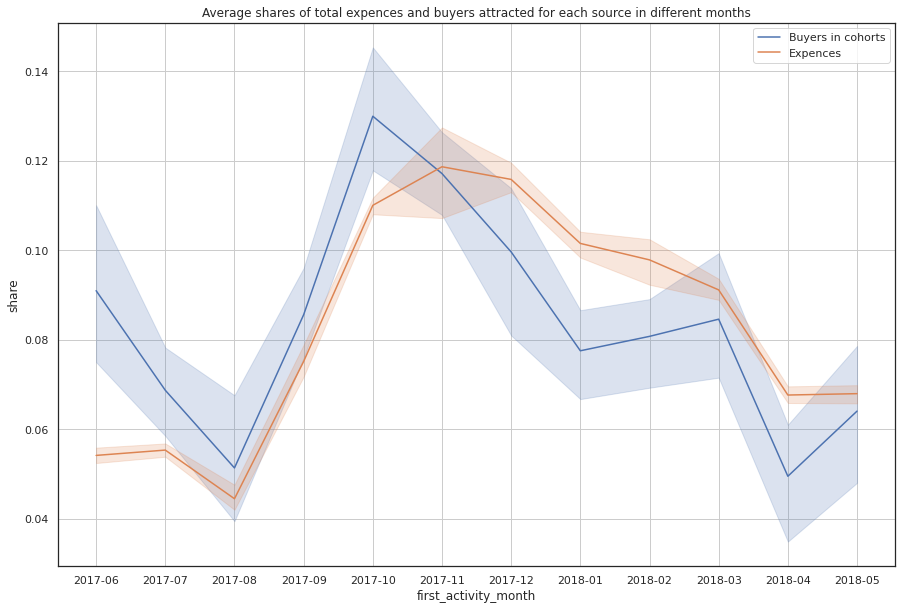

In [114]:
plt.figure(figsize = (15,10))

sns.lineplot(data=n_buyers, x="first_activity_month", y="n_buyers_share")
sns.lineplot(data=sources_months, x="dt_month", y="month_share")

plt.title("Average shares of total expences and buyers attracted for each source in different months")
plt.legend(['Buyers in cohorts', 'Expences'])
plt.ylabel('share')

plt.grid()
plt.show()

As it can be observed, there is some correlation, but it is not too strict. The biggest shares of both expences and buyers are found in the period from 2017-09 to 2018-03. There is interesting differences can be found: on months 2017-06 - 2017-07 number of buyers is decreasing, but the share of spent monet stays more or less the same; also from 2017-12 to 2018-03 share of buyers has suffered significant fall and rise, while share of spent money is gradually decreasing.

All in all, the amount of money spent on different sourses do affect the number of users, but the correlation is not very strong. 

#### How much did customer acquisition from each of the sources cost?

<a id='ltv_full_report'></a>

This can be represented with CAC metric. For that I need to bring information about number of buyers in month-source cohorts and monthly costs of marketing together.

First of all I need to create a cohorts, not only grouped by the first activity month, but also the source_id. I will analyze this question with the `first_source_id` from the `orders` dataset

In [115]:
# Info on revenue of different cohorts from different sources on different time points:
full_cohorts_revenue = orders.groupby(['first_source_id','first_activity_month','months_passed']).agg({'revenue':'sum'}).reset_index()
#Info on amounts of buyers in these cohorts:
full_cohorts_n_buyers = orders.groupby(['first_source_id','first_activity_month']).agg({'uid':'nunique'}).reset_index()

In [116]:
full_cohorts_revenue['first_activity_month'] = full_cohorts_revenue['first_activity_month'].apply(str)
full_cohorts_n_buyers['first_activity_month'] = full_cohorts_n_buyers['first_activity_month'].apply(str)

In [117]:
full_cohorts_revenue_n_buyers = pd.merge(full_cohorts_revenue,full_cohorts_n_buyers, left_on=['first_source_id','first_activity_month'], right_on=['first_source_id','first_activity_month'])

In [118]:
#Merged info:
full_cohorts_revenue_n_buyers

,first_source_id,first_activity_month,months_passed,revenue,uid
0,1,2017-06,0,1421.72,240
1,1,2017-06,1,736.27,240
2,1,2017-06,2,772.01,240
3,1,2017-06,3,1517.08,240
4,1,2017-06,4,994.44,240
...,...,...,...,...,...
535,10,2018-03,0,527.94,166
536,10,2018-03,1,11.35,166
537,10,2018-03,2,5.99,166
538,10,2018-04,0,258.70,98


In [119]:
# Calculating amounts of money spent of different sources in different months:
monthly_costs = costs.groupby(['source_id','dt_month']).agg({'costs':'sum'}).reset_index()

In [120]:
monthly_costs['dt_month'] = monthly_costs['dt_month'].apply(str)

In [121]:
full_cohorts_revenue_n_buyers.shape

(540, 5)

In [122]:
# Adding this information to the full report dataset:
full_report = pd.merge(full_cohorts_revenue_n_buyers,monthly_costs,left_on = ['first_activity_month','first_source_id'], right_on = ['dt_month', 'source_id'], how = 'left')

In [123]:
full_report = full_report.rename(columns = {'uid':'n_buyers'})
full_report.drop(['first_source_id','dt_month'], inplace=True, axis=1)

In [124]:
full_report

,first_activity_month,months_passed,revenue,n_buyers,source_id,costs
0,2017-06,0,1421.72,240,1.0,1125.61
1,2017-06,1,736.27,240,1.0,1125.61
2,2017-06,2,772.01,240,1.0,1125.61
3,2017-06,3,1517.08,240,1.0,1125.61
4,2017-06,4,994.44,240,1.0,1125.61
...,...,...,...,...,...,...
535,2018-03,0,527.94,166,10.0,526.41
536,2018-03,1,11.35,166,10.0,526.41
537,2018-03,2,5.99,166,10.0,526.41
538,2018-04,0,258.70,98,10.0,388.25


In [125]:
#Checking, if merging was applied well:
print(costs.costs.sum())
print(full_report[full_report['months_passed']==0]['costs'].sum())

329131.62
329131.61999999994


In [126]:
#calculating CAC and LTV:

full_report['ltv'] = full_report['revenue']/full_report['n_buyers']
full_report['cac'] = full_report['costs']/full_report['n_buyers']

In [127]:
print('All cohorts\' LTV:')
full_report.pivot_table(index = 'source_id', columns = 'months_passed', values = 'ltv', aggfunc = 'mean').round(2).cumsum(axis=1)

All cohorts' LTV:


months_passed,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1.0,5.30,6.14,6.99,8.01,8.93,9.51,10.69,13.16,14.35,15.63,17.03,19.08
2.0,6.07,7.58,9.21,10.93,12.46,13.03,13.47,14.04,14.54,15.38,16.29,17.15
3.0,3.95,4.37,4.63,4.91,5.15,5.34,5.49,5.64,5.80,5.90,6.01,6.14
4.0,3.92,4.23,4.44,4.70,4.96,5.46,5.84,6.03,6.38,6.99,7.59,8.73
5.0,4.43,4.78,5.28,6.97,7.34,7.68,8.01,8.29,8.58,8.97,9.10,9.16
9.0,2.73,3.39,3.88,4.38,4.78,5.07,5.37,5.69,6.23,6.58,6.67,6.75
10.0,2.91,3.08,3.19,3.31,3.50,3.63,3.71,3.79,3.82,3.88,3.94,3.99


In [128]:
#ADDED BY REVIEWER 

full_cohorts_revenue_n_buyers.revenue.sum()

252057.20000000007

In [129]:
print('All cohorts\' CAC:')
full_report.pivot_table(index = 'source_id', columns = 'months_passed', values = 'cac', aggfunc = 'mean').round(2)

All cohorts' CAC:


months_passed,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1.0,7.23,7.24,7.13,7.09,6.89,6.47,6.36,6.15,6.03,6.02,5.26,4.69
2.0,12.68,13.11,12.67,12.39,11.81,11.08,10.48,10.03,9.65,9.12,7.44,6.49
3.0,13.76,13.64,13.16,12.73,12.45,11.97,11.73,11.40,11.14,11.34,10.13,8.73
4.0,6.18,6.11,5.98,5.89,5.87,5.86,5.84,6.17,6.46,6.13,5.33,5.43
5.0,7.68,7.56,7.33,6.92,6.74,6.39,6.13,5.49,5.45,5.40,5.59,5.14
9.0,7.65,7.25,5.31,5.33,3.92,3.92,3.38,3.17,2.70,2.43,2.44,1.85
10.0,4.73,4.88,4.88,5.17,4.67,5.05,4.46,3.68,4.45,4.45,4.09,2.78


In [130]:
full_report['cac'].mean()

7.6787848514921375

This can be turned into a lineplot representing CAC of new buyers in different months of the studied period: <a id='4'></a>

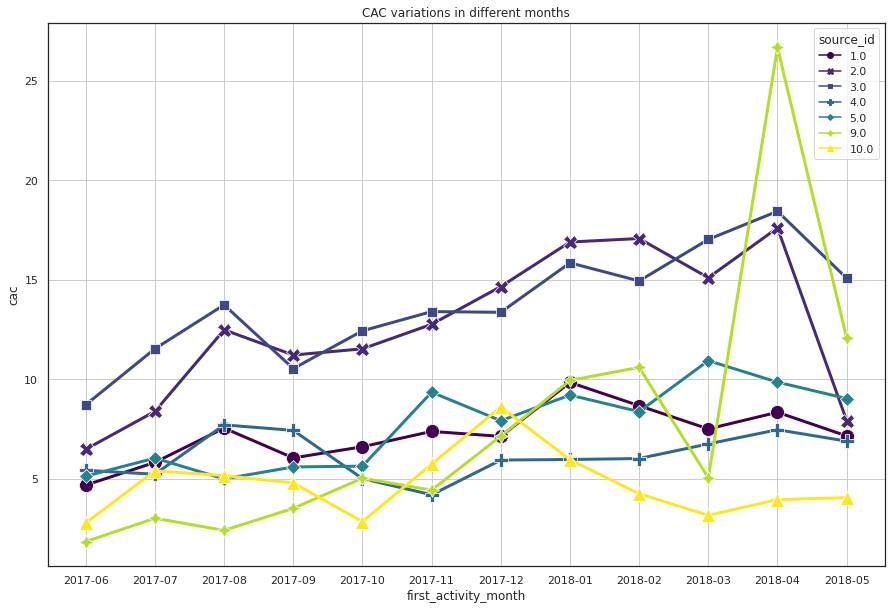

In [131]:
plt.figure(figsize = (15,10))
palette = sns.color_palette("viridis", as_cmap=True)
sns.lineplot(data = full_report, x = 'first_activity_month', y = 'cac', hue = 'source_id', style="source_id",palette=palette,linewidth = 3, markers = True,dashes=False, markersize=14, legend = 'full')
plt.title('CAC variations in different months')
plt.grid()
plt.show()

As it can be observed here, CAC differs in different months, with, sometimes dramatic, rises and falls. There is only 1 conclusion here - new buyers at the end of the observations are never cheaper, than they were at the beginning.

All interesting numbers can be observed on the previous 2 pivot tables, but to ease everything, ROI can be calculated:

#### How worthwhile where the investments? (ROI)

Cumulative ROI will let us understand how the invested money return by users' purchases in different cohort's lifetimes. For that ROI for every month and sourse can be calculated:

In [132]:
full_report['roi'] = full_report['ltv']/full_report['cac']

In [133]:
full_report_pivot = full_report.pivot_table(index='source_id', columns='months_passed', values='roi', aggfunc='mean')

full_report_pivot.fillna(0).cumsum(axis=1).round(2) 

months_passed,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1.0,0.77,0.91,1.06,1.25,1.42,1.54,1.73,2.12,2.36,2.61,2.89,3.32
2.0,0.52,0.64,0.76,0.91,1.05,1.12,1.18,1.25,1.32,1.45,1.58,1.71
3.0,0.30,0.33,0.35,0.37,0.39,0.41,0.42,0.44,0.45,0.46,0.47,0.49
4.0,0.65,0.71,0.74,0.79,0.83,0.92,0.99,1.02,1.09,1.20,1.31,1.52
5.0,0.62,0.68,0.77,1.07,1.13,1.20,1.26,1.31,1.36,1.44,1.46,1.48
9.0,0.51,0.64,0.78,0.94,1.08,1.19,1.31,1.42,1.64,1.81,1.84,1.88
10.0,0.66,0.69,0.72,0.74,0.78,0.81,0.83,0.85,0.85,0.87,0.88,0.90


The best results in terms of ROMI is found for source 1, It is 3.3 by the end of the dataset. Source 3 and 10 failed to pay off by the end of the study. Other sources atrracted about 1,5-2 times more money, than were spent on buyers attraction.

Results in the last average cohort's lifetime's point (months passed = 11) should show roughly the same tendences as the graph I've made [previously](#ratio_spent_gained):

In [134]:
for_bar = full_report_pivot.fillna(0).cumsum(axis=1).round(2).loc[:][11]
for_bar.name = 'ROI'
for_bar = for_bar.to_frame().reset_index()

Building both graphs for comparison: <a id='2'></a>

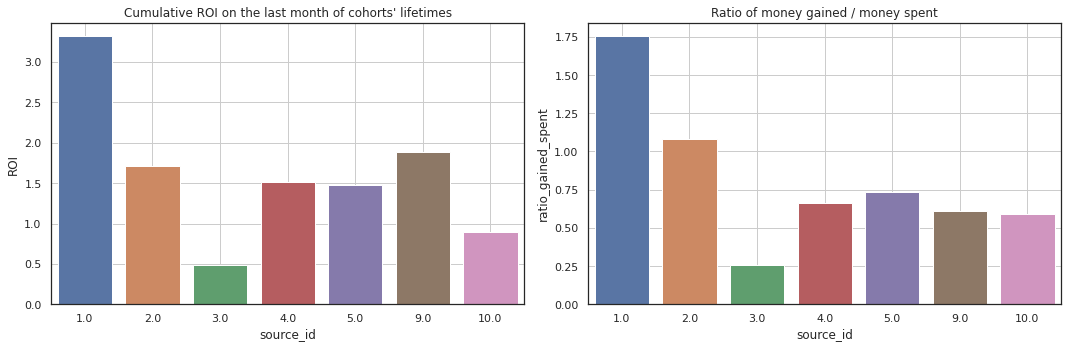

In [135]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
ax1 = sns.barplot(data = for_bar, x = 'source_id', y = 'ROI')
plt.title("Cumulative ROI on the last month of cohorts' lifetimes")
plt.tight_layout()
plt.grid()

plt.subplot(1, 2, 2)
ax2 = sns.barplot(data = sources, x = 'source_id', y = 'ratio_gained_spent')
plt.title("Ratio of money gained / money spent")
plt.tight_layout()
plt.grid()

ROI has revealed previously hidden information: if looking only on amounts of spent and gained money sources 3,4,9,and 10 dont pay off the investments. But looking on the ROI numbers, it is now clear, that the attracted buyers pay off the investments. The only weak sources here re 3 and 10, with the smallest ROI by the end of the 12th month of the study and the geatest results for source 1 - absolute champion. Sources 2,4,5,9 accumulate about 1,5-2 times more money per customer, than were spent to attract them.

# Conclusion

* The best investments were made to the sourse 1, as it shows the best cumulative ROI after 12 month of average cohorts lifetime. Also, it is one of the least invested one (after sources 9 and 10)
* The worst investments were to the source 3, it showed the biggest CAC with the smallest LTV. Even after 12-months those money were not paid off, the gained amount is about 2-times less, than the spent one
* Optimistic results were showed by sources 2, 4,5 and 9, as the cumulative ROI was 1.5-1.8.

* Looking on the CAC for the different cohorts in [dynamics](#4) I can assume, that the limits of attracted new customers are not nearly achieved, as only source 9 shows the great increase in CAC. So new and new customers can be attracted from most of sources, exept this one.

All in all I would say, that the experiment with sourse 3 (I can explain such great investments in it only with experiment) was completely failed with a loss of about 50% of invested money.

The most interesting sources to invest in are 1 and 2, as the smallest amounts of money spent on them with the greatest numbers of attracted buyers. 

Sources 4,5,9 also have a potential to bring new buyers, who will bring back 1.5-1.8 money, spent on them.